## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**  **-> Q0, Q1**

`! git clone https://github.com/ds4e/knn`

**Q0**

**1. What is the difference between regression and classification?**

The main difference between regression and classification is that regression predicts continuous numerical values (prices, sales), while classification assigns discrete labels (e.g., a vs b). Regression outputs real numbers, whereas classification categorizes data into predefined categories. Common algorithms for regression include Linear Regression and Random Forest Regression, while classification uses models like Logistic Regression and Decision Trees.









**2. What is a confusion table? What does it help us understand about a model's performance?**

A confusion table is a performance evaluation tool for classification models. It is a table that compares actual vs. predicted values, showing counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

It helps us understand a model’s performance by providing insights into accuracy, precision, and recall. For instance, it helps identify whether a model is making more false positives (Type I errors) or false negatives (Type II errors). This can be especially useful in medical cases (eg. testing positive for COVID-19).

**3. What does the SSE quantify about a particular model?**

Sum of Squared Errors (SSE) quantifies the total discrepancy between the actual and predicted values in a regression model. It is calculated as the sum of the squared differences between observed values and model predictions. A lower SSE indicates a better-fitting model, while a higher SSE suggests greater error.

**4. What are overfitting and underfitting?**


Overfitting and underfitting are issues that occur when a machine learning model fails to generalize well. Overfitting happens when a model is too complex, capturing not only the true patterns but also noise in the training data. On the other hand, underfitting occurs when the model is too simple to capture the underlying patterns, resulting in poor performance on both the training and test data. It is very important to be able to balance both, to create an ideal model.

**5. Why does splitting the data into training and testing sets, and choosing  𝑘  by evaluating accuracy or SSE on the test set, improve model performance?**

Splitting the data into training and testing sets and choosing the value of 𝑘 by evaluating sum of squared errors (SSE) helps improve model performance (It helps adjust to unseen data). The training set is used to train the model, while the test set evaluates its ability to perform on new data, preventing overfitting or underfitting. This process helps identify the best model configuration.

**6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**


In classification, reporting a class label as a prediction provides a direct outcome, making it easier to interpret and apply, especially when a specific category is needed. However, it can fail to capture uncertainty in the prediction. On the other hand, reporting a probability distribution over class labels gives a more detailed picture, reflecting the model's confidence in each class, which can be useful for decision-making in uncertain situations. The downside is that probabilities can be more difficult to interpret and may overcomplicate the decision-making process.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**1. Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.**

In [ ]:
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/ds4e/knn/main/data/USA_cars_datasets.csv'
cars = pd.read_csv(url)

# Keep only specified columns
cars = cars[['price', 'year', 'mileage']]

# Check for missing values
na_counts = cars.isna().sum()

# Display first few rows and dimensions
print(cars.head())
print("\nDimensions of dataset:", cars.shape)
print("\nMissing values per column:\n", na_counts)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Dimensions of dataset: (2499, 3)

Missing values per column:
 price      0
year       0
mileage    0
dtype: int64


**2. Maxmin normalize year and mileage.**

In [ ]:
# Min-max normalization function
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize 'year' and 'mileage'
cars['year'] = min_max_normalize(cars['year'])
cars['mileage'] = min_max_normalize(cars['mileage'])

print(cars.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


**3. Split the sample into ~80% for training and ~20% for evaluation.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split data into training (80%) and evaluation (20%)
train_data, eval_data = train_test_split(cars, test_size=0.2, random_state=42)
print("\nTraining set dimensions:", train_data.shape)
print("Evaluation set dimensions:", eval_data.shape)


Training set dimensions: (1999, 3)
Evaluation set dimensions: (500, 3)


**4. Use the  𝑘 NN algorithm and the training data to predict price using year and mileage for the test set for 𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?**

k=3, Mean Squared Error: 148758273.42533332


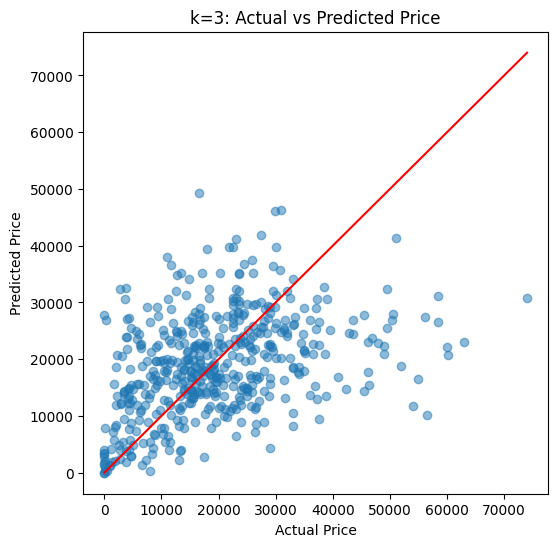

k=10, Mean Squared Error: 116985807.20716001


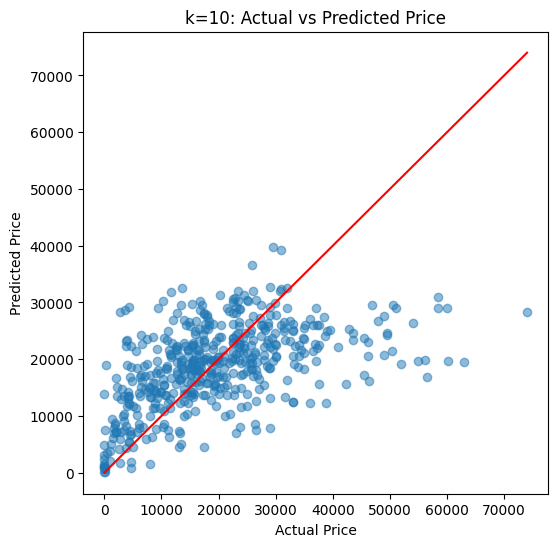

k=25, Mean Squared Error: 113418198.6715296


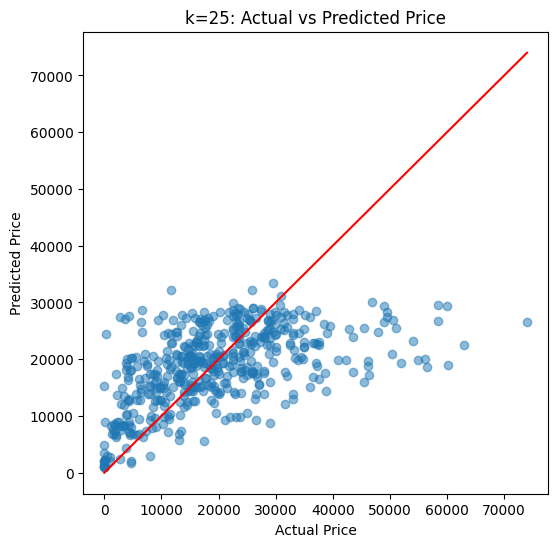

k=50, Mean Squared Error: 111455974.7697832


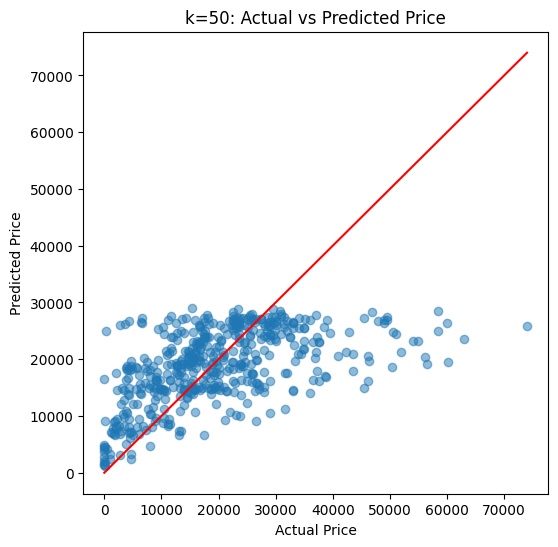

k=100, Mean Squared Error: 111584608.78782581


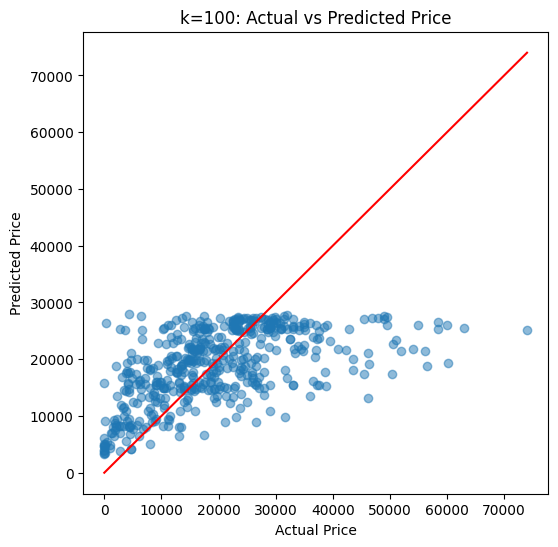

k=300, Mean Squared Error: 114434688.85539366


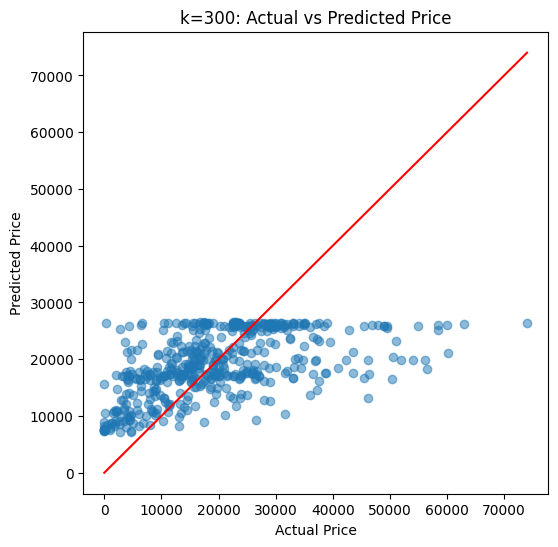

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation to 'year' and 'mileage'
cars['year'] = np.log1p(cars['year'])
cars['mileage'] = np.log1p(cars['mileage'])

# Split data into training (80%) and evaluation (20%)
train_data, eval_data = train_test_split(cars, test_size=0.2, random_state=42)

# Separate features and target variable
X_train, y_train = train_data[['year', 'mileage']], train_data['price']
X_test, y_test = eval_data[['year', 'mileage']], eval_data['price']

# List of k values
k_values = [3, 10, 25, 50, 100, 300]

# Iterate over different k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Print MSE
    print(f'k={k}, Mean Squared Error: {mse}')

    # Scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k={k}: Actual vs Predicted Price')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
    plt.show()

It appears that the optimal K value is ~100. At this level, there is a strong positive correlation between actual and predictive price. The variables do not have a strong positive correlation as K increases. At K=300, there is no correlation between the two variables.

**5. Determine the optimal  𝑘  for these data.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# List of k values
k_values = [3, 10, 25, 50, 100, 300]
errors = {}

# Iterate over different k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors[k] = mse

    # Print MSE
    print(f'k={k}, Mean Squared Error: {mse}')

# Determine optimal k
optimal_k = min(errors, key=errors.get)
print(f'Optimal k: {optimal_k} with MSE: {errors[optimal_k]}')



k=3, Mean Squared Error: 148254537.44311112
k=10, Mean Squared Error: 122964279.3481
k=25, Mean Squared Error: 116540138.1222144
k=50, Mean Squared Error: 116432080.94583121
k=100, Mean Squared Error: 114989892.19734381
k=300, Mean Squared Error: 115884204.9503505
Optimal k: 100 with MSE: 114989892.19734381


**6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)**

As k varied, the predicted versus actual price plots likely showed signs of overfitting at low
k values (e.g.,
k
=
3
k=3), where predictions closely followed noise in the data, resulting in high MSE. As k increased (e.g.,
k
=
10
,
25
,
50), the model improved, reducing MSE and better generalizing the data. The optimal
k was found at 100, where MSE was lowest, suggesting a balance between bias and variance. However, at very high k values (e.g.,
k
=
300), the model likely underfit the data, producing overly smoothed predictions and a slight increase in MSE.